In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import albumentations as A
import cv2
import matplotlib.gridspec as gridspec

In [2]:
# Database reference: https://www.fc.up.pt/addi/ph2%20database.html

dataset_path = "./PH2Dataset/PH2 Dataset images/"
subject_list = sorted(os.listdir(dataset_path))

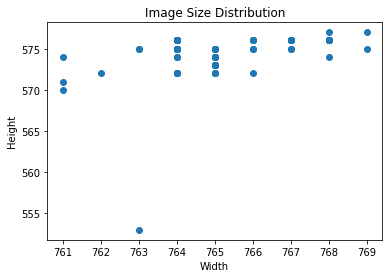

In [3]:
width = []
height = []
for subject in subject_list:
    img_folder = subject + "_Dermoscopic_Image"
    filename = subject + ".bmp"
    img = plt.imread(os.path.join(dataset_path, subject, img_folder, filename))
    height.append(img.shape[0])
    width.append(img.shape[1])
    # break
    
plt.title("Image Size Distribution")
plt.xlabel("Width")
plt.ylabel("Height")
plt.scatter(width, height)


In [4]:
print("Height average:", np.array(height).mean())
print("Height std:", np.array(height).std())
print("Width average:", np.array(width).mean())
print("Width std:", np.array(width).std())

Height average: 575.27
Height std: 1.996772395642528
Width average: 766.275
Width std: 1.5714245129817723


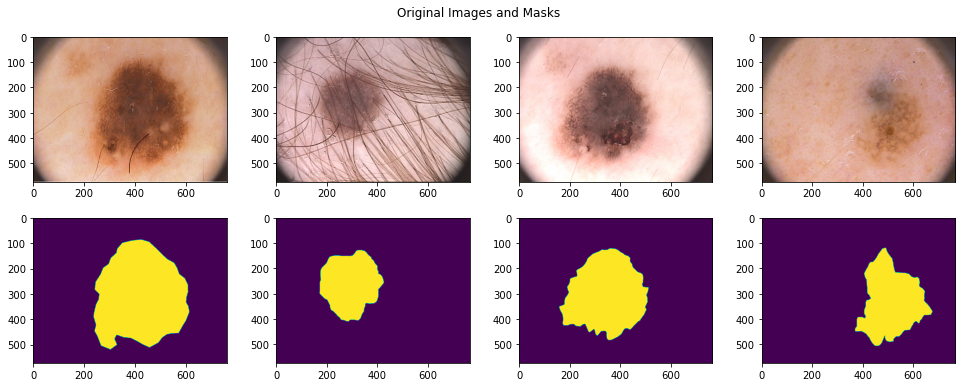

In [5]:
fig = plt.figure(figsize=(17, 6))
plt.suptitle("Original Images and Masks", y = 0.95)
outer = gridspec.GridSpec(1, 4, wspace=0.1, hspace=0.1)
cnt = 0
for subject in subject_list:

    img_folder = subject + "_Dermoscopic_Image"
    img_filename = subject + ".bmp"
    mask_folder =  subject + "_lesion"
    mask_filename =  mask_folder + ".bmp"

    image_path = os.path.join(dataset_path, subject, img_folder, img_filename)
    mask_path = os.path.join(dataset_path, subject, mask_folder, mask_filename)

    # load the image from disk, swap its channels from BGR to RGB,
    # and read the associated mask from disk in grayscale mode
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mask = cv2.imread(mask_path,0) 
    
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                    subplot_spec=outer[cnt], wspace=0.1, hspace=0.25)
    
    ax1 = plt.Subplot(fig, inner[0])
    ax1.imshow(image)
    ax2 = plt.Subplot(fig, inner[1])
    ax2.imshow(mask)

    fig.add_subplot(ax1)
    fig.add_subplot(ax2)
    
    cnt += 1
    if cnt == 4:
        break

In [8]:
transform = A.Compose([
    A.augmentations.geometric.resize.Resize(width=256, height=192),
])

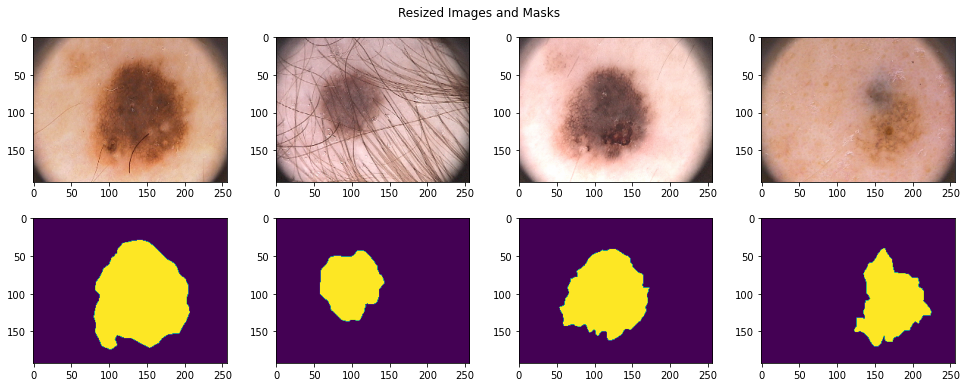

In [9]:
fig = plt.figure(figsize=(17, 6))
plt.suptitle("Resized Images and Masks", y = 0.95)
outer = gridspec.GridSpec(1, 4, wspace=0.1, hspace=0.1)
cnt = 0
for subject in subject_list:

    img_folder = subject + "_Dermoscopic_Image"
    img_filename = subject + ".bmp"
    mask_folder =  subject + "_lesion"
    mask_filename =  mask_folder + ".bmp"

    image_path = os.path.join(dataset_path, subject, img_folder, img_filename)
    mask_path = os.path.join(dataset_path, subject, mask_folder, mask_filename)
    
    # load the image from disk, swap its channels from BGR to RGB,
    # and read the associated mask from disk in grayscale mode
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mask = cv2.imread(mask_path,0) 
    masks = []
    masks.append(mask)
    
    transformed = transform(image=image, masks=masks)
    transformed_image = transformed['image']
    transformed_masks = transformed['masks']
    
    
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                    subplot_spec=outer[cnt], wspace=0.1, hspace=0.25)
    
    ax1 = plt.Subplot(fig, inner[0])
    ax1.imshow(transformed_image)
    ax2 = plt.Subplot(fig, inner[1])
    ax2.imshow(transformed_masks[0])

    fig.add_subplot(ax1)
    fig.add_subplot(ax2)
    
    cnt += 1
    if cnt == 4:
        break